In [75]:
%matplotlib inline

import math

import numpy as np
import scipy as sp
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.cross_validation import train_test_split


import matplotlib.pyplot as plt


In [76]:
data = pd.read_csv('../data/initial_data_urban_area.csv')

In [77]:
# list(data.columns.values)

In [78]:
df = data[data['StationCount']>0]
# df = data
print len(df)
# df["rate"] = df["Total"]/df["count"]
df = df.drop('UANUM', 1).drop('UANAME', 1).drop('UANAME_LONG', 1).drop('PeoplePerStation', 1).drop('StationsPerPerson', 1).drop('State', 1).drop('Geography', 1).drop('Latitude', 1).drop('Longitude', 1)
df = df.dropna()
# list(df.columns.values)

1010


In [88]:
df["Household Income Less than $10,000"] =df["Household Income Less than $10,000"]/df["Population"]
df["Household Income $10,000 to $14,999"] =df["Household Income $10,000 to $14,999"]/df["Population"]
df["Household Income $15,000 to $19,999"] =df["Household Income $15,000 to $19,999"]/df["Population"]
df["Household Income $20,000 to $24,999"] =df["Household Income $20,000 to $24,999"]/df["Population"]
df["Household Income $25,000 to $29,999"] =df["Household Income $25,000 to $29,999"]/df["Population"]
df["Household Income $30,000 to $34,999"] =df["Household Income $30,000 to $34,999"]/df["Population"]
df["Household Income $35,000 to $39,999"] =df["Household Income $35,000 to $39,999"]/df["Population"]
df["Household Income $40,000 to $44,999"] =df["Household Income $40,000 to $44,999"]/df["Population"]
df["Household Income $45,000 to $49,999"] =df["Household Income $45,000 to $49,999"]/df["Population"]
df["Household Income $50,000 to $59,999"] =df["Household Income $50,000 to $59,999"]/df["Population"]
df["Household Income $60,000 to $74,999"] =df["Household Income $60,000 to $74,999"]/df["Population"]
df["Household Income $75,000 to $99,999"] =df["Household Income $75,000 to $99,999"]/df["Population"]
df["Household Income $100,000 to $124,999"] =df["Household Income $100,000 to $124,999"]/df["Population"]
df["Household Income $125,000 to $149,999"] =df["Household Income $125,000 to $149,999"]/df["Population"]
df["Household Income $150,000 to $199,999"] =df["Household Income $150,000 to $199,999"]/df["Population"]
df["Household Income $200,000 or more"] =df["Household Income $200,000 or more"]/df["Population"]
df["Total; Estimate; Population 18 to 24 years"] =df["Total; Estimate; Population 18 to 24 years"]/df["Population"]
df["Male; Estimate; Population 18 to 24 years"] =df["Male; Estimate; Population 18 to 24 years"]/df["Population"]
df["Female; Estimate; Population 18 to 24 years"] =df["Female; Estimate; Population 18 to 24 years"]/df["Population"]
df["Total; Estimate; Bachelor's degree or higher"] =df["Total; Estimate; Bachelor's degree or higher"]/df["Population"]
df["Male; Estimate; Bachelor's degree or higher"] =df["Male; Estimate; Bachelor's degree or higher"]/df["Population"]
df["Female; Estimate; Bachelor's degree or higher"] =df["Female; Estimate; Bachelor's degree or higher"]/df["Population"]
df["Total; Estimate; Population 25 years and over"] =df["Total; Estimate; Population 25 years and over"]/df["Population"]
df["Male; Estimate; Population 25 years and over"] =df["Male; Estimate; Population 25 years and over"]/df["Population"]
df["Female; Estimate; Population 25 years and over"] =df["Female; Estimate; Population 25 years and over"]/df["Population"]
df["Total; Estimate; Population 25 years and over - Bachelor's degree"] =df["Total; Estimate; Population 25 years and over - Bachelor's degree"]/df["Population"]
df["Male; Estimate; Population 25 years and over - Bachelor's degree"] =df["Male; Estimate; Population 25 years and over - Bachelor's degree"]/df["Population"]
df["Female; Estimate; Population 25 years and over - Bachelor's degree"] =df["Female; Estimate; Population 25 years and over - Bachelor's degree"]/df["Population"]
df["Total; Estimate; Population 25 years and over - Graduate or professional degree"] =df["Total; Estimate; Population 25 years and over - Graduate or professional degree"]/df["Population"]
df["Male; Estimate; Population 25 years and over - Graduate or professional degree"] =df["Male; Estimate; Population 25 years and over - Graduate or professional degree"]/df["Population"]
df["Female; Estimate; Population 25 years and over - Graduate or professional degree"] =df["Female; Estimate; Population 25 years and over - Graduate or professional degree"]/df["Population"]
df["Total; Estimate; Percent bachelor's degree or higher"] =df["Total; Estimate; Percent bachelor's degree or higher"]/df["Population"]
df["Male; Estimate; Percent bachelor's degree or higher"] =df["Male; Estimate; Percent bachelor's degree or higher"]/df["Population"]
df["Female; Estimate; Percent bachelor's degree or higher"] =df["Female; Estimate; Percent bachelor's degree or higher"]/df["Population"]
df["Total; Estimate; Population 25 to 34 years"] =df["Total; Estimate; Population 25 to 34 years"]/df["Population"]
df["Male; Estimate; Population 25 to 34 years"] =df["Male; Estimate; Population 25 to 34 years"]/df["Population"]
df["Female; Estimate; Population 25 to 34 years"] =df["Female; Estimate; Population 25 to 34 years"]/df["Population"]
df["Total; Estimate; Population 25 to 34 years - Bachelor's degree or higher"] =df["Total; Estimate; Population 25 to 34 years - Bachelor's degree or higher"]/df["Population"]
df["Male; Estimate; Population 25 to 34 years - Bachelor's degree or higher"] =df["Male; Estimate; Population 25 to 34 years - Bachelor's degree or higher"]/df["Population"]
df["Female; Estimate; Population 25 to 34 years - Bachelor's degree or higher"] =df["Female; Estimate; Population 25 to 34 years - Bachelor's degree or higher"]/df["Population"]
df["Total; Estimate; Population 35 to 44 years"] =df["Total; Estimate; Population 35 to 44 years"]/df["Population"]
df["Male; Estimate; Population 35 to 44 years"] =df["Male; Estimate; Population 35 to 44 years"]/df["Population"]
df["Female; Estimate; Population 35 to 44 years"] =df["Female; Estimate; Population 35 to 44 years"]/df["Population"]
df["Total; Estimate; Population 35 to 44 years - Bachelor's degree or higher"] =df["Total; Estimate; Population 35 to 44 years - Bachelor's degree or higher"]/df["Population"]
df["Male; Estimate; Population 35 to 44 years - Bachelor's degree or higher"] =df["Male; Estimate; Population 35 to 44 years - Bachelor's degree or higher"]/df["Population"]
df["Female; Estimate; Population 35 to 44 years - Bachelor's degree or higher"] =df["Female; Estimate; Population 35 to 44 years - Bachelor's degree or higher"]/df["Population"]
df["Total; Estimate; Population 45 to 64 years"] =df["Total; Estimate; Population 45 to 64 years"]/df["Population"]
df["Male; Estimate; Population 45 to 64 years"] =df["Male; Estimate; Population 45 to 64 years"]/df["Population"]
df["Female; Estimate; Population 45 to 64 years"] =df["Female; Estimate; Population 45 to 64 years"]/df["Population"]
df["Total; Estimate; Population 45 to 64 years - Bachelor's degree or higher"] =df["Total; Estimate; Population 45 to 64 years - Bachelor's degree or higher"]/df["Population"]
df["Male; Estimate; Population 45 to 64 years - Bachelor's degree or higher"] =df["Male; Estimate; Population 45 to 64 years - Bachelor's degree or higher"]/df["Population"]
df["Female; Estimate; Population 45 to 64 years - Bachelor's degree or higher"] =df["Female; Estimate; Population 45 to 64 years - Bachelor's degree or higher"]/df["Population"]
df["Total; Estimate; Population 65 years and over"] =df["Total; Estimate; Population 65 years and over"]/df["Population"]
df["Male; Estimate; Population 65 years and over"] =df["Male; Estimate; Population 65 years and over"]/df["Population"]
df["Female; Estimate; Population 65 years and over"] =df["Female; Estimate; Population 65 years and over"]/df["Population"]
df["Total; Estimate; Population 65 years and over - Bachelor's degree or higher"] =df["Total; Estimate; Population 65 years and over - Bachelor's degree or higher"]/df["Population"]
df["Male; Estimate; Population 65 years and over - Bachelor's degree or higher"] =df["Male; Estimate; Population 65 years and over - Bachelor's degree or higher"]/df["Population"]
df["Female; Estimate; Population 65 years and over - Bachelor's degree or higher"] =df["Female; Estimate; Population 65 years and over - Bachelor's degree or higher"]/df["Population"]
# df["Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings"] =df["Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings"]/df["Population"]
# df["Male; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings"] =df["Male; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings"]/df["Population"]
# df["Female; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings"] =df["Female; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings"]/df["Population"]
# df["Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Bachelor's degree"] =df["Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Bachelor's degree"]/df["Population"]
# df["Male; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Bachelor's degree"] =df["Male; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Bachelor's degree"]/df["Population"]
# df["Female; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Bachelor's degree"] =df["Female; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Bachelor's degree"]/df["Population"]
# df["Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Graduate or professional degree"] =df["Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Graduate or professional degree"]/df["Population"]
# df["Male; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Graduate or professional degree"] =df["Male; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Graduate or professional degree"]/df["Population"]
# df["Female; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Graduate or professional degree"] =df["Female; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Graduate or professional degree"]/df["Population"]
df["graduate_25+"] =df["graduate_25+"]/df["Population"]

In [95]:
df = df.iloc[np.random.permutation(len(df))]
df.reset_index(drop=True)
# df
# print ""

,StationCount,IncentivesCount,Population,Households,Owners,percent_own,"Household Income Less than $10,000","Household Income $10,000 to $14,999","Household Income $15,000 to $19,999","Household Income $20,000 to $24,999",...,Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings,Male; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings,Female; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings,Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Bachelor's degree,Male; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Bachelor's degree,Female; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Bachelor's degree,Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Graduate or professional degree,Male; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Graduate or professional degree,Female; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Graduate or professional degree,graduate_25+
0,6,3,81926,29117,18792,64.539616,3.490831e-07,2.495579e-07,2.455352e-07,2.284013e-07,...,0.416730,0.519664,0.331397,0.528782,0.654334,0.441716,0.686302,0.794620,0.659473,5.129987e-07
1,2,2,29990,11757,7016,59.675087,1.075161e-06,9.161662e-07,1.041806e-06,7.126973e-07,...,1.103068,1.324975,0.885262,1.373558,1.468089,1.138946,1.783494,2.246115,1.647182,2.055668e-06
2,5,2,266254,100221,66697,66.549925,1.060781e-07,8.304276e-08,8.596272e-08,8.318382e-08,...,0.129046,0.155806,0.105009,0.178251,0.206641,0.152400,0.225045,0.271872,0.204459,1.968910e-07
3,2,1,75702,30792,19434,63.113796,6.121317e-07,4.044816e-07,4.648571e-07,4.280385e-07,...,0.386357,0.458469,0.343267,0.546141,0.676997,0.477821,0.747391,0.945906,0.676706,6.657787e-07
4,1,5,19106,6670,3065,45.952024,3.394156e-06,2.016222e-06,1.095773e-06,1.605307e-06,...,1.377525,1.375484,1.379200,2.123103,2.348739,1.989270,2.725374,3.279964,2.722443,2.695940e-06
5,1,0,2971,1452,843,58.057851,8.043648e-06,5.664541e-06,6.344286e-06,8.156939e-06,...,13.308650,14.243689,11.396836,14.211377,14.124537,14.374958,21.690340,23.676540,21.391451,4.535484e-05
6,7,15,71772,26087,18556,71.131215,1.267661e-07,1.650095e-07,1.407434e-07,1.533617e-07,...,0.673870,0.893705,0.518517,0.943655,1.207407,0.613805,1.204815,1.479574,0.992323,1.427217e-06
7,2,2,66086,27367,18795,68.677604,7.006522e-07,4.902276e-07,5.648722e-07,4.219941e-07,...,0.471734,0.595724,0.355385,0.645916,0.753382,0.568744,0.792225,0.926444,0.733590,7.104977e-07
8,10,0,21675,9523,5675,59.592565,1.394194e-06,1.749660e-06,1.132383e-06,7.769170e-07,...,1.652595,1.781361,1.498316,2.001799,2.275202,1.621315,2.467220,3.241661,2.137070,3.900847e-06
9,2,3,5823,2644,1516,57.337368,1.563084e-06,1.209178e-06,5.544524e-06,3.421089e-06,...,6.398248,6.805598,5.493732,6.359608,7.140477,5.439808,8.852825,10.876352,7.370256,2.301957e-05


In [90]:
ndata = df.values
ndata = np.hsplit(ndata, np.array([1]))
Y = ndata[0]
X = ndata[1]




In [91]:
train_X, dev_X, train_Y, dev_Y = train_test_split(X, Y, test_size=0.25, random_state=42)
print train_X.shape, train_Y.shape
print dev_X.shape, dev_Y.shape
# print train_X
# print train_Y

(719, 73) (719, 1)
(240, 73) (240, 1)


In [92]:
def try_reggressor(regressor) :

#     print train_X.shape, train_Y.shape
#     print dev_X.shape, dev_Y.shape

    regressor.fit(train_X, train_Y)
    dev_predictions = regressor.predict(dev_X)

    plt.plot(dev_Y, dev_predictions, 'r.')
    plt.show()

    _explained_variance_score = explained_variance_score(dev_Y, dev_predictions)
    _mean_absolute_error = mean_absolute_error(dev_Y, dev_predictions)
    _mean_squared_error = mean_squared_error(dev_Y, dev_predictions)
    _r2_score = r2_score(dev_Y, dev_predictions)
    print _explained_variance_score, _mean_absolute_error, _mean_squared_error, _r2_score


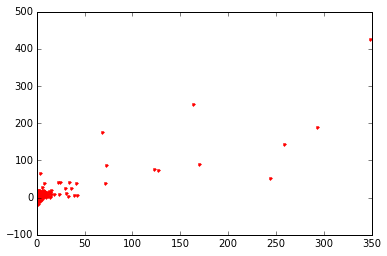

0.717893142159 9.07092465438 484.24323545 0.717816382123


In [93]:
try_reggressor(LinearRegression())

/opt/anaconda/envs/capstone/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


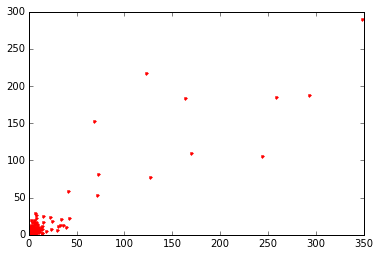

0.830444567315 6.15625 291.393125 0.830196148924
[  2.87424990e-02   2.23358723e-01   1.17285108e-01   1.42538334e-02
   1.03927368e-01   7.91354080e-05   1.46956821e-05   2.37175555e-05
   1.17261482e-05   6.66375061e-06   6.94549390e-06   4.46563540e-06
   1.47259279e-05   8.38847916e-06   1.42218032e-05   4.40314142e-05
   2.26119714e-05   2.75055263e-05   3.26848788e-05   6.18136844e-05
   8.03680020e-05   3.80810477e-04   5.56587451e-05   2.13874179e-05
   5.62581241e-07   2.27018049e-06   2.92576805e-07   5.48193607e-03
   1.61928978e-04   4.01993249e-04   2.53508777e-07   0.00000000e+00
   2.73550549e-06   0.00000000e+00   1.30570481e-07   6.84652809e-06
   0.00000000e+00   2.54369294e-07   6.47016425e-07   5.53306215e-05
   2.68060769e-05   1.95671750e-05   4.25627603e-06   2.80971764e-06
   6.33067862e-08   3.60417242e-05   7.62682817e-05   2.58205449e-05
   1.58514707e-06   4.72229903e-06   0.00000000e+00   4.33897401e-04
   1.29417505e-05   4.66332694e-05   2.19868265e-07   

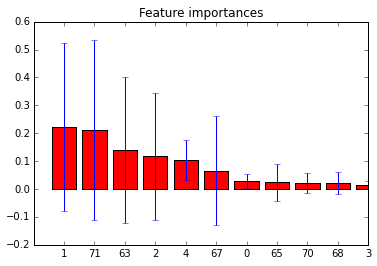

In [94]:
forest = RandomForestRegressor()
try_reggressor(forest)
print forest.feature_importances_

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

cols = train_X.shape[1]
for f in range(cols):
    print("%d. (%f) %s " % (f + 1, importances[indices[f]], df.columns[indices[f]+1]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(cols), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(cols), indices)
plt.xlim([-1, 10])
plt.show()

/opt/anaconda/envs/capstone/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


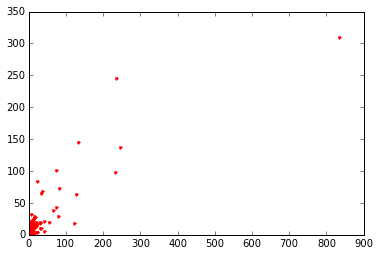

0.62846694842 8.34416666667 1417.03525 0.626105410455


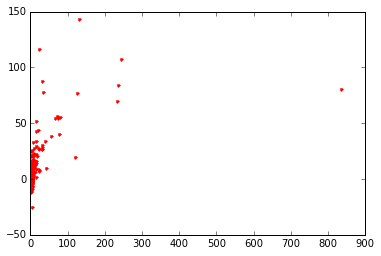

0.253009028797 12.803314675 2846.77199019 0.248859444532


In [74]:
try_reggressor(RandomForestRegressor())
try_reggressor(LinearRegression())